In [429]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.io.wavfile
import scipy.signal
import wave, struct
import pandas as pd
from scipy.signal import butter, freqz, filtfilt
from scipy.signal import find_peaks
from scipy.fft import rfft, fft, fftfreq, rfftfreq
import os
os.chdir('/Users/sohinib/Downloads')
os.listdir(os.getcwd())
os.getcwd()

'/Users/sohinib/Downloads'

## The "butterworth" function returns the filtered signal data.
### sampling rate: 1000, cutoff: 25, order: 3.

In [430]:
columns = ['sysTime','x','y', 'z']

dt = 0.01
sampling_rate = 1000
order = 3
cutoff = 25

def butterworth(data, sampling_rate, order, type_, cutoff):

    nyq = 0.5 * sampling_rate
    low = cutoff / nyq
    b, a = scipy.signal.butter(order, low, btype=type_,analog=False, fs=None)
    filtered_data = scipy.signal.filtfilt(b, a, data,axis=0)
    
    return filtered_data

## The function "filtered_graph" gets the raw data (both linear accelerometer and accelerometer) and returns the plotted graph, for comparison.

In [431]:
def filtered_graph(linear_data,acc_data):
    filtered_lin = butterworth(linear_data.mag,sampling_rate,order,"low",cutoff)
    peaks_lin,_ = find_peaks(filtered_lin,distance=30,height=filtered_lin.mean())
    filtered_acc = butterworth(acc_data.mag,sampling_rate,order,"low",cutoff)
    peaks_acc,_ = find_peaks(filtered_acc,distance=30,height=filtered_acc.mean())
    
    plt.plot(peaks_acc,filtered_acc[peaks_acc],"x")
    plt.plot(filtered_acc)
    plt.plot(filtered_lin)
    plt.plot(peaks_lin,filtered_lin[peaks_lin],"x")
    return plt.show

## The "fft" function gets the fast fourier transform of the signal data.

In [432]:
def fft(data):
    data_fft = np.fft.rfft(data.mag)
    freq_fft = np.fft.rfftfreq(data.size,d=dt)
    return data_fft, freq_fft

## The "data_graph" function plots x, y, z axes and the magnitude.

In [433]:
def data_graph(data):
    plt.plot(data.x)
    plt.plot(data.y)
    plt.plot(data.z)
    plt.plot(data.mag)
    return plt.show

## The "step_function" function gets the linear accelerometer and accelerometer data.
### It plots the smoothened out signal and finds peaks (steps) in both the signals.
### Then, it takes the average number of peaks and returns it as the number of steps.

In [434]:
def step_function(linear_data,acc_data):
    filtered_lin = butterworth(linear_data.mag,sampling_rate,order,"low",cutoff)
    peaks_lin,_ = find_peaks(filtered_lin,distance=30,height=filtered_lin.mean())
    filtered_acc = butterworth(acc_data.mag,sampling_rate,order,"low",cutoff)
    peaks_acc,_ = find_peaks(filtered_acc,distance=30,height=filtered_acc.mean())
    steps = round((len(peaks_lin)+len(peaks_acc))/2)
    return print("Number of steps:\t",steps)

In [435]:
# plt.plot(data_lin.mag[1000:1200])

In [436]:
# filtered_lin = butterworth(data_lin.mag,sampling_rate,order,"low",cutoff)
# plt.plot(filtered_lin[1000:1200])

## Reading the csv file and adding a magnitude column for both (linear accelerometer and accelerometer data).
### Dropping the "sysTime" column. 

In [437]:
data_lin = pd.read_csv(os.getcwd()+"/" + "linacce 8.csv",header = None, names = columns)
data_lin["mag"] = np.sqrt(data_lin.x*data_lin.x+data_lin.y*data_lin.y+data_lin.z*data_lin.z)
data_lin.drop("sysTime",axis=1)

,x,y,z,mag
0,-0.831830,-0.711413,0.517756,1.210835
1,-0.706423,-0.502561,0.665398,1.092866
2,-0.624683,-0.405330,0.849449,1.129639
3,-0.635801,-0.325283,0.741628,1.029594
4,-0.526600,-0.219768,0.192611,0.602250
...,...,...,...,...
8049,-0.131548,1.276782,-1.943284,2.328912
8050,-0.686985,1.332501,-2.105130,2.584392
8051,-1.295454,1.644376,-2.478644,3.244357
8052,-1.180323,1.854705,-2.863366,3.609980


In [438]:
data_acc = pd.read_csv(os.getcwd()+"/" + "acce 8.csv",header = None, names = columns)
data_acc["mag"] = np.sqrt(data_acc.x*data_acc.x+data_acc.y*data_acc.y+data_acc.z*data_acc.z)
data_acc.drop("sysTime",axis=1)

,x,y,z,mag
0,-2.608476,-3.110232,-8.732092,9.629492
1,-2.381697,-2.919978,-8.511151,9.307977
2,-2.310296,-2.940485,-8.495883,9.282454
3,-2.158811,-2.821632,-8.862171,9.547782
4,-1.840722,-3.156336,-9.713750,10.378230
...,...,...,...,...
8048,1.537752,-2.836003,-10.226883,10.723653
8049,1.374142,-2.935246,-10.775343,11.252198
8050,0.474962,-2.722688,-10.994187,11.336259
8051,0.255369,-2.385739,-11.473491,11.721688


In [439]:
samples = len(data_lin)
per_sample_duration = data_lin.size/(20*60)
per_sample_freq = 1/per_sample_duration

## Plotting the accelerometer data to get an idea of the signals.

<function matplotlib.pyplot.show(close=None, block=None)>

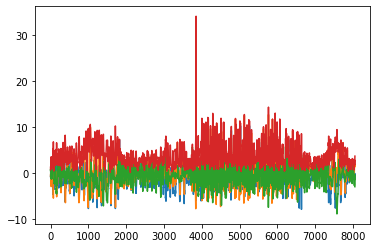

In [440]:
data_graph(data_lin)

<function matplotlib.pyplot.show(close=None, block=None)>

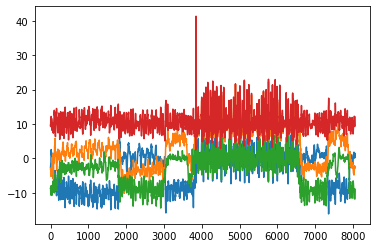

In [441]:
data_graph(data_acc)

## Getting the fft and plotting the frequency domain signals.

/Users/sohinib/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


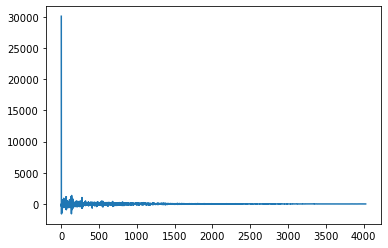

In [442]:
fft_lin, sr = fft(data_lin)
plt.plot(fft_lin)

/Users/sohinib/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


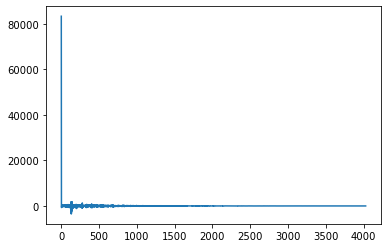

In [443]:
fft_acc, sr = fft(data_acc)
plt.plot(fft_acc)

## Smoothening the data using the butterworth filter, then plotting it.
### The crosses represent peaks (steps).

<function matplotlib.pyplot.show(close=None, block=None)>

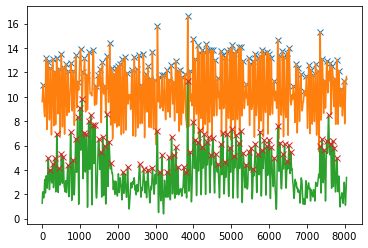

In [444]:
filtered_graph(data_lin,data_acc)

## Smoothened data plot.

<function matplotlib.pyplot.show(close=None, block=None)>

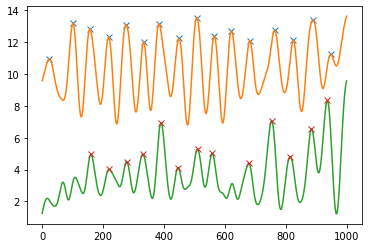

In [445]:
filtered_graph(data_lin[:1000],data_acc[:1000])

## Finally, the step function to calculate the number of steps.

In [446]:
step_function(data_lin,data_acc)

Number of steps:	 114


## actual number of steps: 130
## calculated number of steps : 114

## To test it again.

In [447]:
data_lin = pd.read_csv(os.getcwd()+"/" + "linacce 11.csv",header = None, names = columns)
data_lin["mag"] = np.sqrt(data_lin.x*data_lin.x+data_lin.y*data_lin.y+data_lin.z*data_lin.z)
data_lin.drop("sysTime",axis=1)

,x,y,z,mag
0,-0.134558,-0.020477,0.053875,0.146382
1,-0.145167,0.058501,0.180442,0.238862
2,-0.129339,0.106085,0.080182,0.185504
3,-0.183264,0.069957,-0.040705,0.200341
4,-0.208793,0.070236,-0.098357,0.241250
...,...,...,...,...
8104,0.369606,-1.026055,-0.077966,1.093378
8105,0.654839,-0.864149,-0.321112,1.130788
8106,0.774633,-0.853695,-0.511172,1.261011
8107,0.771760,-0.977460,-0.085461,1.248337


In [448]:
data_acc = pd.read_csv(os.getcwd()+"/" + "acce 11.csv",header = None, names = columns)
data_acc["mag"] = np.sqrt(data_acc.x*data_acc.x+data_acc.y*data_acc.y+data_acc.z*data_acc.z)
data_acc.drop("sysTime",axis=1)

,x,y,z,mag
0,-0.818947,-3.713927,-8.867410,9.648569
1,-0.742007,-3.650459,-8.921597,9.668057
2,-0.729433,-3.682642,-9.039103,9.787712
3,-0.738564,-3.705694,-9.129515,9.880571
4,-0.714464,-3.679349,-9.144933,9.883211
...,...,...,...,...
8103,0.365690,-3.187472,-9.141790,9.688448
8104,0.620011,-3.060386,-9.845776,10.329070
8105,0.795446,-3.019970,-10.063273,10.536718
8106,0.810714,-3.074756,-9.842632,10.343538


<function matplotlib.pyplot.show(close=None, block=None)>

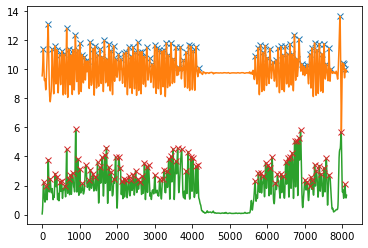

In [449]:
filtered_graph(data_lin,data_acc)

<function matplotlib.pyplot.show(close=None, block=None)>

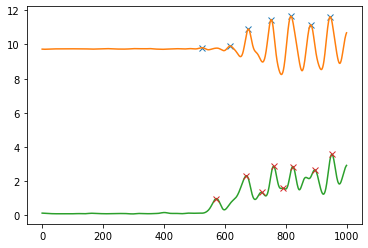

In [450]:
filtered_graph(data_lin[5000:6000],data_acc[5000:6000])

In [451]:
step_function(data_lin,data_acc)

Number of steps:	 100


## actual number of steps: 105
## calculated number of steps : 100